In [116]:
#Importing the required Libraries

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random
from matplotlib.pyplot import scatter
import collections
import matplotlib.pyplot as plt

In [155]:
'''
Loading the dataset 
making it suitable for clustering
'''
df = pd.read_csv('iBeacon_RSSI_Labeled.csv')
df.drop(['location','date'],axis=1,inplace=True)
df.drop_duplicates(inplace=True)
data = df.values
print('shape of data = ',df.shape)
df.head()

shape of data =  (648, 13)


,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
5,-200,-200,-82,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
6,-200,-200,-80,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
7,-200,-200,-86,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [7]:
'''
Select the initial seeds for clustering based on distance
data = dataset in the form of Array
k = number of cluster needed
lst = list containing index of initial seeds
mat = distance matrix
'''

def initial_k(data,k):
    mat = euclidean_distances(data)
    lst = []
    a = np.random.randint(0,len(mat))
    lst.append(a)
    dis = np.zeros(len(data))
    for j in range(k-1):
        for i in range(len(data)):
            dis+= mat[:,a]
        a = np.argmax(dis)
        lst.append(a)
    return lst,mat

In [16]:
'''
Make cluster based on the nearest distance from seeds
mat = distance matrix
ini = list containing index of seeds
cluster = an array represing ith index as the cluster number of that index data point
cost = total sum of intra class ecludian distance of data
'''

def make_cluster(mat,ini):
    cost = 0
    cluster = np.zeros(len(mat))
    for i in range(len(mat)):
        minimum = np.inf 
        for j in range(len(ini)):
            if mat[i,ini[j]]<minimum:
                cluster[i] = j+1
                minimum = mat[i,ini[j]]
        cost+=minimum
    return cluster,cost

In [149]:
'''
Update cluster seeds to get saturated cluster
data = data = dataset in the form of Array
k = number of cluster needed
max_iter = Maximum number of iteration 
cluster = an array represing ith index as the cluster number of that index data point
cost = total sum of intra class ecludian distance of data

'''

def Kmedois(data,k,max_iter=200):
    #data = df.values
    ini,mat = initial_k(data,k)
    cluster,cost = make_cluster(mat,ini)
    for i in range(max_iter):
        swap = random.randint(0,len(data)-1)
        if swap in ini:
            continue
        else:
            for j in range(k):
                tmp = ini[j]
                ini[j]=swap
                cluster1,cost1=make_cluster(mat,ini)
                if cost > cost1:
                    cluster = cluster1
                    cost = cost1
                    continue
                else:
                    ini[j] = tmp
    return cluster,cost

In [156]:
cluster, cost = Kmedois(data,5)
print('The sum of total Intraclass Ecludian distance = ',cost)
print('cluster representation\n',cluster)

The sum of total Intraclass Ecludian distance =  65485.896295058315
cluster representation
 [5. 5. 4. 4. 4. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 1. 3. 3. 1. 1. 1. 2.
 2. 1. 4. 1. 4. 2. 4. 2. 1. 2. 2. 2. 2. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 3. 3. 3. 4. 4.
 2. 2. 2. 4. 2. 4. 2. 2. 4. 4. 2. 2. 2. 2. 4. 2. 2. 4. 2. 2. 1. 2. 2. 2.
 2. 1. 1. 2. 1. 1. 2. 2. 2. 2. 1. 2. 2. 1. 3. 1. 1. 1. 1. 1. 1. 3. 5. 5.
 3. 1. 5. 1. 5. 3. 5. 5. 3. 3. 3. 3. 3. 3. 3. 3. 3. 5. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 1. 1.
 1. 5. 5. 5. 5. 1. 1. 5. 3. 3. 5. 3. 3. 5. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 5. 1. 3. 1. 1. 1. 1. 1. 1.
 1. 1. 3. 5. 5. 1. 1. 1. 1. 1. 1. 1. 1. 5. 1. 1. 5. 1. 1. 1. 1. 4. 4. 4.
 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 1. 1. 5. 5. 5. 3. 5. 5. 5. 1. 3. 3. 5.
 3. 2. 3. 3. 3. 3. 3. 3. 1. 5. 5

### Applying KMedoids on Virtual data with dimension 2 (for visualisation purpose)

In [157]:
# creating virtual Instances of data with 2 attributes for clustering
data = []
for i in range(500):
    x = (np.random.randint(0,1000,2))
    data.append(x)

In [158]:
cluster, cost = Kmedois(data,5)

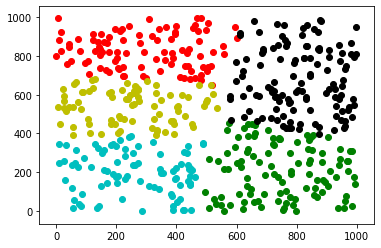

In [159]:
color = ['b','g','r','y','c','k','m']
fig = plt.figure()
ax  = fig.add_subplot(111)
for i in range(1,6):
    lst = []
    col = color[i]
    for j in range(len(data)):
        if cluster[j]==i:
            lst.append(data[j])
    lst = pd.DataFrame(lst)
    ax.scatter(lst[0],lst[1],c=col)
plt.show()